___


# Visualización de datos con Pandas

En este Notebook aprenderemos acerca de las funcionalidades de Visualización de datos en Pandas. 

** Aunque estas carácterísticas están construídas sobre otra librería que se llama Matplotlib, se integran en Pandas para facilitar su uso. **



## Importar

In [1]:
import numpy as np
import pandas as pd

# Para que aparezcan las visualizaciones dentro del Notebook
%matplotlib inline

## Preparar los datos

Presentaremos los siguientes ejemplos con base a algunos datos falsos que se pueden cargar como DataFrames desde los archivos CSV de este directorio. 

In [2]:
df1 = pd.read_csv('df1.csv',index_col=0)
df2 = pd.read_csv('df2.csv')

# Tipos de gráficos (plots)

Hay varios tipos de gráficos que se pueden crear desde Pandas. La mayoría de ellos son estadísticos por naturaleza:

* df.plot.area     
* df.plot.bar      
* df.plot.barh     
* df.plot.hist     
* df.plot.line     
* df.plot.scatter
* df.plot.box      
* df.plot.hexbin   
* df.plot.pie
* df.plot.density  
* df.plot.kde      


También es posible usar la notación:
* df.plot(kind='hist'), configurando el argumento 'kind' de acuerdo al tipo de gráfico que queramos según la lista de arriba (por ejemplo: 'box','barh', etc..)
___


## Area

In [3]:
df2

,a,b,c,d
0,0.039762,0.218517,0.103423,0.957904
1,0.937288,0.041567,0.899125,0.977680
2,0.780504,0.008948,0.557808,0.797510
3,0.672717,0.247870,0.264071,0.444358
4,0.053829,0.520124,0.552264,0.190008
5,0.286043,0.593465,0.907307,0.637898
6,0.430436,0.166230,0.469383,0.497701
7,0.312296,0.502823,0.806609,0.850519
8,0.187765,0.997075,0.895955,0.530390
9,0.908162,0.232726,0.414138,0.432007


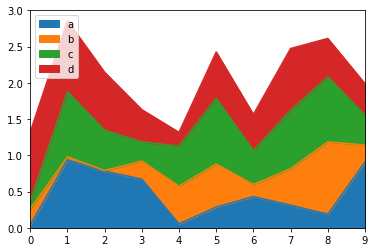

In [4]:
df2.plot.area()

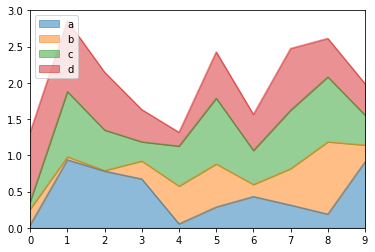

In [5]:
df2.plot.area(alpha=0.5)

___

## Barplots

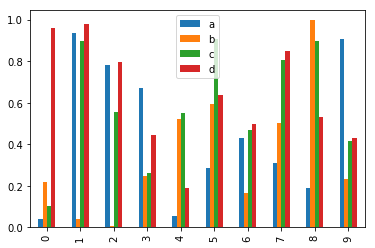

In [6]:
df2.plot.bar()

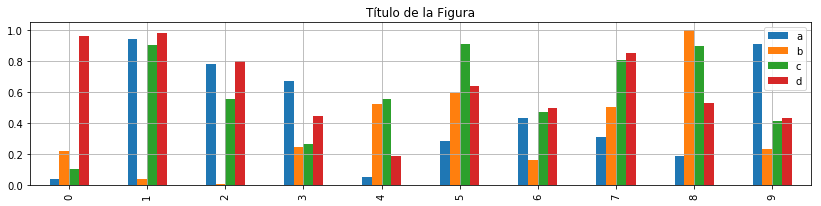

In [7]:
df2.plot.bar(figsize=(14,3), title='Título de la Figura', grid=True)

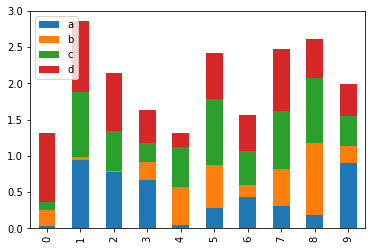

In [8]:
df2.plot.bar(stacked=True)

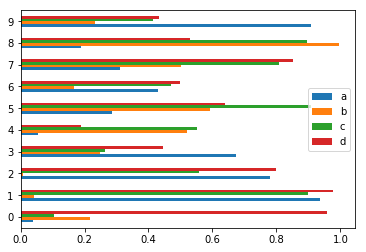

In [9]:
df2.plot.barh()

___

## Histogramas

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 2000-01-01 to 2002-09-26
Data columns (total 4 columns):
A    1000 non-null float64
B    1000 non-null float64
C    1000 non-null float64
D    1000 non-null float64
dtypes: float64(4)
memory usage: 39.1+ KB


In [11]:
df1.head()

,A,B,C,D
2000-01-01,1.339091,-0.163643,-0.646443,1.041233
2000-01-02,-0.774984,0.137034,-0.882716,-2.253382
2000-01-03,-0.921037,-0.482943,-0.417100,0.478638
2000-01-04,-1.738808,-0.072973,0.056517,0.015085
2000-01-05,-0.905980,1.778576,0.381918,0.291436


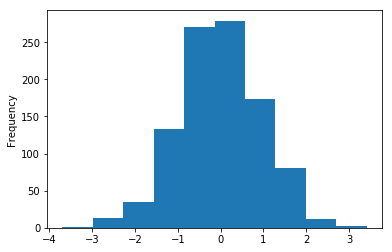

In [12]:
# Por defecto se usan 10 intervalos de clase (bins)
df1['A'].plot.hist()

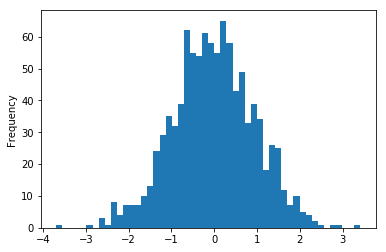

In [13]:
# Aumentamos el número de intervalos de clase 
df1['A'].plot.hist(bins=50)

___

## Gráficos de línea (Line Plots)

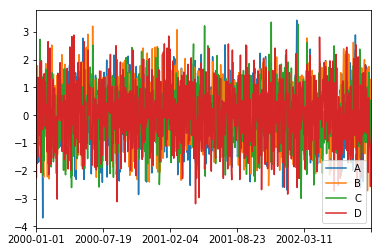

In [14]:
df1.plot.line()

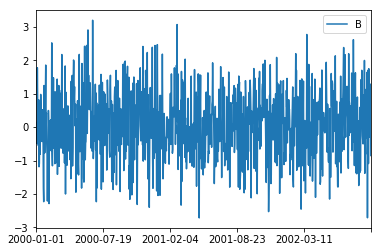

In [15]:
df1.plot.line(x=df1.index,y='B')

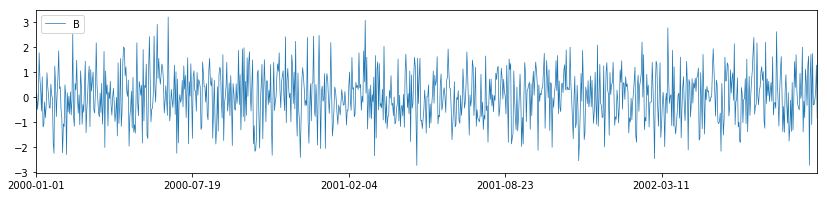

In [16]:
df1.plot.line(x=df1.index,y='B',figsize=(14,3),lw=0.7)

___

## Gráficos de dispersión (Scatter Plots)

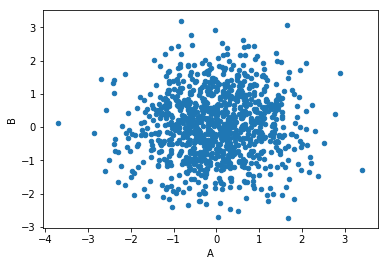

In [17]:
# Se requieren 2 argumentos: 'x' y 'y'  
df1.plot.scatter(x='A',y='B')

Se puede cambiar el color de los puntos basado en el valor de otra columna mediante el parámetro 'c'. En este caso, se estaría presentando la información de 3 series de datos al mismo tiempo: X, Y, y el color. 

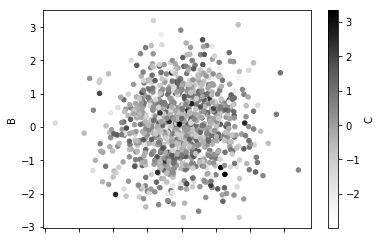

In [18]:
df1.plot.scatter(x='A',y='B',c='C')

También, se puede usar el parámetro cmap para cambiar el mapa de colores a usar. Ver: http://matplotlib.org/users/colormaps.html

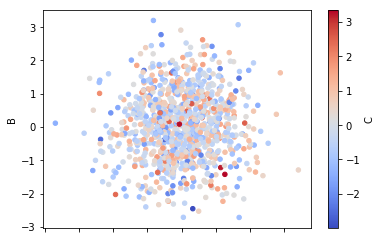

In [26]:
df1.plot.scatter(x='A',y='B',c='C',cmap='coolwarm')

O incluso, se puede graficar cada punto con diferente tamaño para dar información adicional de otra columna mediante el parámetro 's'. Este parámetro necesita recibir un arreglo, y no solamente el nombre de la columna:

C:\Users\Estudiante\Anaconda3\lib\site-packages\matplotlib\collections.py:836: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


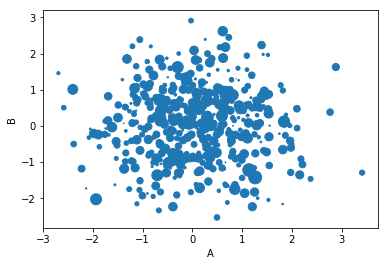

In [29]:
# Se multiplica por un factor para que quede más grande
df1.plot.scatter(x='A',y='B',s=df1['C']*50)

C:\Users\Estudiante\Anaconda3\lib\site-packages\matplotlib\collections.py:836: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


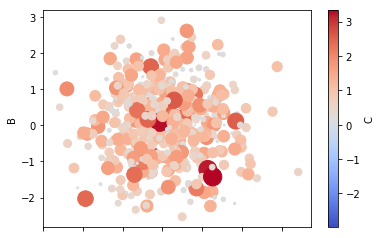

In [30]:
df1.plot.scatter(x='A',y='B',c='C',cmap='coolwarm',s=df1['C']*100)

___

## BoxPlots

Un diagrama de caja (boxplot), también conocido como diagrama de caja y bigotes, es un gráfico que está basado en cuartiles y mediante el cual se visualiza la distribución de un conjunto de datos. Está compuesto por un rectángulo (la «caja») y dos brazos (los «bigotes»).

Es un gráfico que suministra información sobre los valores mínimo y máximo, los cuartiles Q1, Q2 o mediana y Q3, y sobre la existencia de valores atípicos y la simetría de la distribución. Primero es necesario encontrar la mediana para luego encontrar los 2 cuartiles restantes.

![Boxplot](https://upload.wikimedia.org/wikipedia/commons/2/25/Boxplot.svg "BoxPlot")

** Información tomada de Wikipedia: https://es.wikipedia.org/wiki/Diagrama_de_caja **

In [31]:
df2

,a,b,c,d
0,0.039762,0.218517,0.103423,0.957904
1,0.937288,0.041567,0.899125,0.977680
2,0.780504,0.008948,0.557808,0.797510
3,0.672717,0.247870,0.264071,0.444358
4,0.053829,0.520124,0.552264,0.190008
5,0.286043,0.593465,0.907307,0.637898
6,0.430436,0.166230,0.469383,0.497701
7,0.312296,0.502823,0.806609,0.850519
8,0.187765,0.997075,0.895955,0.530390
9,0.908162,0.232726,0.414138,0.432007


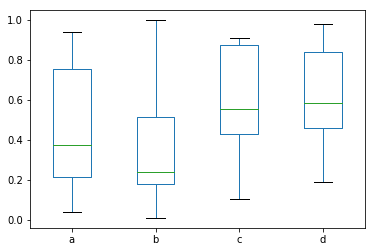

In [32]:
df2.plot.box() 

___

## Hexagonal Bin Plot

Es útil para datos bi-variados. Este tipo de diagrama es realmente útil si su diagrama de dispersión (scatter) es demasiado denso para ser interpretado. Ayuda a agrupar el área espacial del gráfico ya que la intensidad del color de cada hexágono puede interpretarse como una mayor concentración de puntos en esta área.


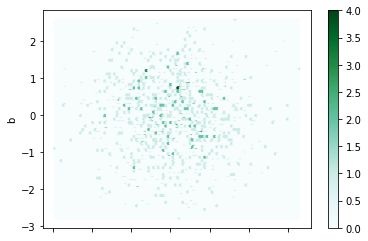

In [33]:
df = pd.DataFrame(np.random.randn(1000, 2), columns=['a', 'b'])
df.plot.hexbin(x='a',y='b')

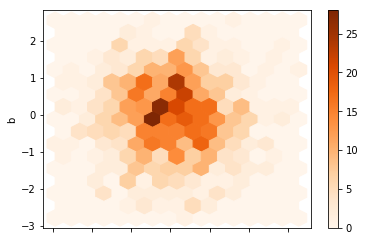

In [34]:
df.plot.hexbin(x='a',y='b',gridsize=15,cmap='Oranges')

____

## Torta (Pie)


In [39]:
df2.head(5)

,a,b,c,d
0,0.039762,0.218517,0.103423,0.957904
1,0.937288,0.041567,0.899125,0.977680
2,0.780504,0.008948,0.557808,0.797510
3,0.672717,0.247870,0.264071,0.444358
4,0.053829,0.520124,0.552264,0.190008


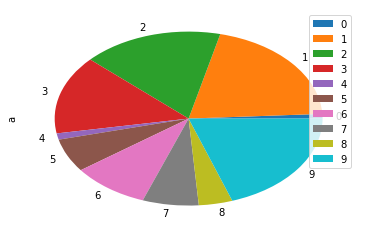

In [36]:
df2.plot.pie(y='a')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000FFC68A4F60>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000FFC693D978>], dtype=object)

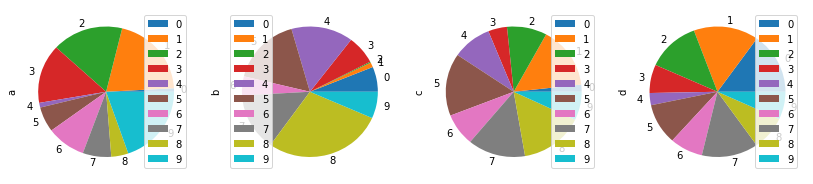

In [37]:
df2.plot.pie(subplots=True, figsize=(14,3))

____

## Gráfico de Estimación de Densidad de Kernel (Kernel Density Estimation - KDE)

* Ver: https://en.wikipedia.org/wiki/Kernel_density_estimation
* Ver explicación y su diferencia con los histogramas: https://mglerner.github.io/posts/histograms-and-kernel-density-estimation-kde-2.html?p=28 

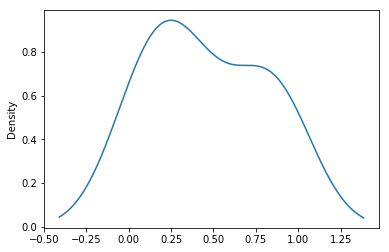

In [40]:
df2['a'].plot.kde()

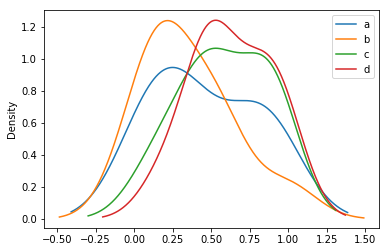

In [41]:
df2.plot.density()

## Hojas de estilos

Matplotlib tiene [hojas de estilo](http://matplotlib.org/gallery.html#style_sheets) que se pueden usar para hacer que sus figuras se vean un poco más agradables. Estas hojas de estilo incluyen:
* plot_bmh
* plot_fivethirtyeight
* plot_ggplot
* y más...

Básicamente, crean un conjunto de reglas de estilo que cumplen las gráficas. Se recomienda usarlas, ya que hacen que todas las Figuras tengan el mismo aspecto y parezcan más profesionales. Incluso se pueden crear estilos propios si se requiere uno particular para su empresa (aunque es un poco tedioso).


** Antes de usar hojas de estilo plt.style.use () las figuras se ven así:**

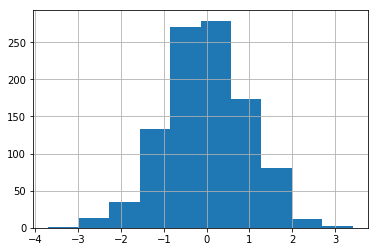

In [42]:
df1['A'].hist()

### Cambiando el estilo

** Primero hay que importar la librería: **

In [43]:
import matplotlib.pyplot as plt

**Ahora vamos a probar varios estilos y a graficar un histograma para probar:**

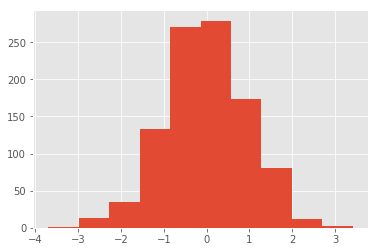

In [44]:
plt.style.use('ggplot')
df1['A'].hist()

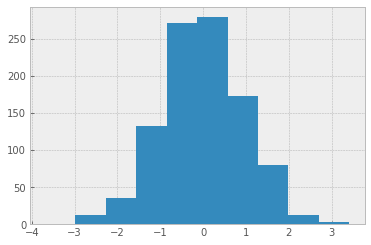

In [45]:
plt.style.use('bmh')
df1['A'].hist()

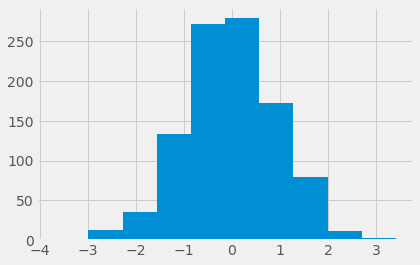

In [46]:
plt.style.use('fivethirtyeight')
df1['A'].hist()

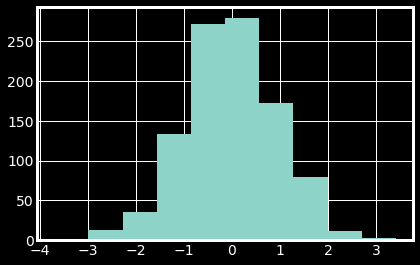

In [47]:
plt.style.use('dark_background')
df1['A'].hist()

** Por ahora, nos quedaremos con el estilo ggplot para presentar las funcionalidades de visualización de datos con Pandas! **

In [48]:
plt.style.use('ggplot')

### Las funcionalidades de visualización de Pandas son muy fáciles de usar, en comparación con **matplotlib**. Esto equilibra la facilidad de uso con el control sobre la figura. 
Muchas de las llamadas a 'plot' también aceptan argumentos adicionales que vale la pena explorar.